In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
#Normalizing the values
def norm_data(i):
    x=(i-i.min()/(i.max()-i.min()))
    return x

In [10]:
data_norm = norm_data(data.iloc[::-1])
data_norm

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
213,-64.819589,12.616466,0.00,1.989657,60.893929,0.00,8.115353,1.67,0.0,6.833333
212,-64.820189,12.766466,0.00,1.849657,61.143929,0.00,7.975353,1.57,0.0,6.833333
211,-64.816049,12.746466,0.00,1.929657,60.953929,0.00,7.935353,1.64,0.0,6.833333
210,-64.819849,13.306466,0.00,1.899657,60.593929,0.00,7.895353,1.59,0.0,6.833333
209,-64.820469,12.526466,0.00,2.789657,60.143929,0.08,8.675353,1.06,0.0,6.833333
...,...,...,...,...,...,...,...,...,...,...
4,-64.819279,11.656466,3.62,1.149657,60.613929,0.55,7.565353,0.00,0.0,0.833333
3,-64.819039,11.596466,3.69,1.199657,60.143929,0.57,7.715353,0.00,0.0,0.833333
2,-64.820519,11.916466,3.55,1.449657,60.523929,0.39,7.275353,0.00,0.0,0.833333
1,-64.819089,12.276466,3.60,1.269657,60.263929,0.48,7.325353,0.00,0.0,0.833333


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.metrics import f1_score,classification_report

In [13]:
x = data.iloc[:,0:9]
y = data.iloc[:,9]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [15]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [16]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5384615384615384

In [17]:
confusion_matrix(y_pred,y_test)

array([[14,  2,  4,  0,  0,  1],
       [ 9, 11,  1,  0,  2,  1],
       [ 2,  1,  2,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 0,  3,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  2,  5]], dtype=int64)

In [18]:
count_missclassified = ((y_test !=y_pred).sum())
count_missclassified

30

Check for K Value

In [19]:
accuracy_rate=[];
for i in range(1,40):
    rkn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(rkn,data_norm,data['Type'],cv=10)
    accuracy_rate.append(score.mean())

C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HRITHIK\anaconda3\lib\s

C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HRITHIK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [20]:
accuracy_rate[0:5]

[0.7753246753246753,
 0.7378787878787879,
 0.7943722943722944,
 0.7798701298701298,
 0.7898268398268399]

Text(0, 0.5, 'accuracy_rate')

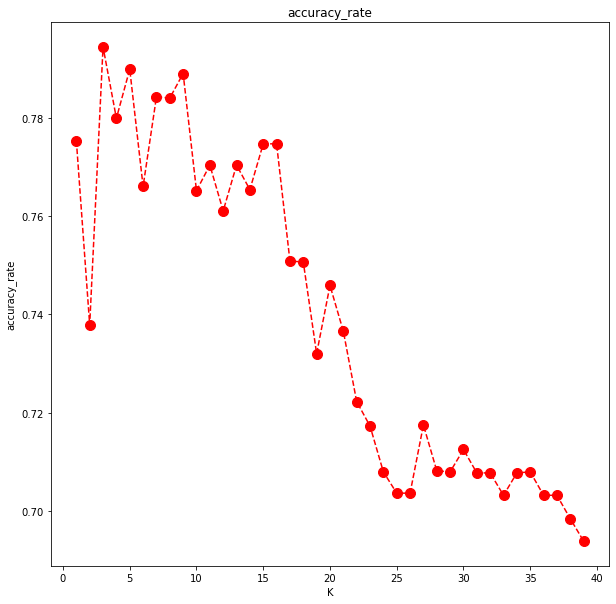

In [21]:
plt.figure(figsize=(10,10));
plt.plot(range(1,40),accuracy_rate,color='red',linestyle="dashed",marker='o',markersize=10)
plt.title('accuracy_rate')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

Increasing k value will lead to error

In [22]:
final_model = KNeighborsClassifier(n_neighbors=2);
final_model.fit(x_train,y_train)
final_models=final_model.predict(x_test)
final_models

array([1, 1, 2, 1, 1, 6, 2, 5, 1, 1, 3, 6, 1, 7, 1, 2, 7, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 3, 5, 1, 1, 1, 2, 2, 7, 2, 7, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 3, 5, 2, 6, 2, 1, 7, 2, 5, 1, 1, 2, 7, 3, 1, 1, 7],
      dtype=int64)

In [23]:
accuracy=accuracy_score(y_test,final_models)
accuracy

0.5384615384615384

In [24]:
print(classification_report(y_test,final_models))

              precision    recall  f1-score   support

           1       0.62      0.64      0.63        25
           2       0.48      0.59      0.53        17
           3       0.25      0.14      0.18         7
           5       0.75      0.75      0.75         4
           6       0.00      0.00      0.00         4
           7       0.71      0.62      0.67         8

    accuracy                           0.54        65
   macro avg       0.47      0.46      0.46        65
weighted avg       0.52      0.54      0.53        65

